In [217]:
import numpy as np
import scipy as sp
import sympy as sym
import matplotlib.pyplot as plt

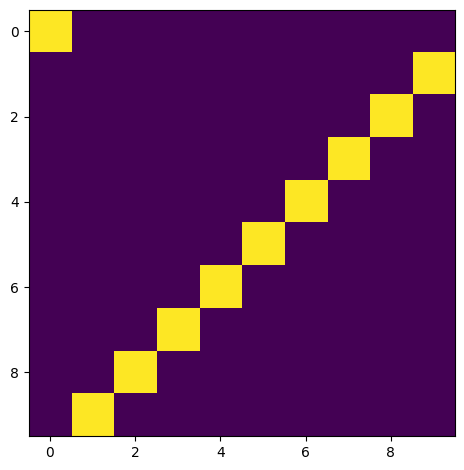

In [218]:
F = sp.linalg.dft(10)
A = F @ F
plt.figure()
plt.imshow(np.abs(A))
plt.tight_layout()

In [219]:
np.allclose(np.linalg.inv(A), 1/100 * A)

True

In [220]:
A = np.random.randn(5, 3)

In [221]:
e1 = np.zeros((A.shape[0]), dtype=np.float64)
e1[0] = 1.
v1 = A[:, 0] + np.sign(A[0, 0]) * np.linalg.norm(A[:, 0]) * e1
v1 /= np.linalg.norm(v1)
H1 = np.eye(A.shape[0]) - np.outer(2 * v1, v1.conj())
A1 = H1 @ A

In [222]:
e2 = np.zeros((A.shape[0] - 1), dtype=np.float64)
e2[0] = 1.
v2 = A1[1:, 1] + np.sign(A1[1, 1]) * np.linalg.norm(A1[1:, 1]) * e2
v2 /= np.linalg.norm(v2)
H2 = np.eye(A.shape[0]-1) - np.outer(2 * v2, v2.conj())
A2 = np.zeros_like(A)
A2[0, :] = A1[0, :]
A2[1:, 1:] = H2 @ A1[1:, 1:]

In [223]:
e3 = np.zeros((A.shape[0] - 2), dtype=np.float64)
e3[0] = 1.
v3 = A2[2:, 2] + np.sign(A2[2, 2]) * np.linalg.norm(A2[2:, 2]) * e3
v3 /= np.linalg.norm(v3)
H3 = np.eye(A.shape[0]-2) - np.outer(2 * v3, v3.conj())
A3 = np.zeros_like(A)
A3[0, :] = A2[0, :]
A3[1, :] = A2[1, :]
A3[2:, 2:] = H3 @ A2[2:, 2:]

In [224]:
Q, R = np.linalg.qr(A)

In [225]:
Imn = np.zeros_like(A)
Imn[:A.shape[1], :] = np.eye(A.shape[1])
QT = Imn
print(QT)
QT[2:, 2:] = H3 @ QT[2:, 2:]
print(QT)
QT[1:, 1:] = H2 @ QT[1:, 1:]
print(QT)
QT = H1 @ QT
print(QT)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[ 1.          0.          0.        ]
 [ 0.          1.          0.        ]
 [ 0.          0.         -0.8353836 ]
 [ 0.          0.          0.37018766]
 [ 0.          0.          0.40631925]]
[[ 1.          0.          0.        ]
 [ 0.         -0.59153019  0.25931698]
 [ 0.         -0.47767129 -0.75755393]
 [ 0.          0.27067109  0.3260857 ]
 [ 0.         -0.59047383  0.50252847]]
[[-0.42629701 -0.3605088   0.70035367]
 [ 0.58114608 -0.44464053 -0.0260428 ]
 [-0.22583818 -0.53475382 -0.64666076]
 [ 0.48973424  0.39445562  0.08561182]
 [ 0.43554286 -0.48038663  0.28866415]]


In [226]:
A - QT @ A3[:3, :]

array([[ 1.11022302e-16, -1.24900090e-16, -6.66133815e-16],
       [ 0.00000000e+00, -2.22044605e-16,  0.00000000e+00],
       [ 0.00000000e+00, -1.66533454e-16,  4.44089210e-16],
       [ 0.00000000e+00,  1.11022302e-16,  0.00000000e+00],
       [ 1.11022302e-16,  0.00000000e+00, -4.44089210e-16]])

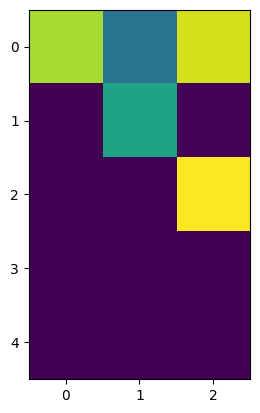

In [227]:
plt.figure()
plt.imshow(np.abs(A3))
plt.show()

In [228]:
m, n, k = sym.symbols('m n k', integer=True, nonnegative=True)
f = (4 * (m-k+1) * (n-k+1) - n + m).simplify()
sum_f = sym.summation(f, (k, 1, n)).simplify()
sum_f.expand()

2*m*n**2 + 3*m*n - 2*n**3/3 - n**2 + 2*n/3

In [229]:
g = 4*(m-k+1)*(n-k+1)-n+m#(m-k+1) * (2*m-2*k-1)
sum_f = sym.summation(g, (k, 1, n)).simplify()
sum_f.expand()

2*m*n**2 + 3*m*n - 2*n**3/3 - n**2 + 2*n/3

# 4

In [230]:
import tensorly as tl

In [231]:
n = 100
np.random.seed(0)
a = np.random.randn(n)
b = np.random.randn(n)
b -= a.T @ b / (a.T @ a) * a

canonical decomposition

In [232]:
A = np.einsum('i,j,k->ijk', a, a, a) + 2 * np.einsum('i,j,k->ijk', a, b, a) - np.einsum('i,j,k->ijk', a, b, b) 

In [233]:
cpd = tl.decomposition.CP(2, linesearch=True)
w, f = cpd.fit_transform(A)

In [234]:
np.allclose(np.einsum('a,ia,ja,ka->ijk', w, f[0], f[1], f[2], optimize=True), A)

True

In [235]:
U = np.stack((a, a), axis=1)
V = np.stack((a, b), axis=1)
W = np.stack((a, 2*a-b), axis=1)
A_cp = np.einsum('ia,ja,ka->ijk', U, V, W, optimize=True)
np.allclose(A_cp, A)

True

tucker decomposition

In [236]:
U = a[:, None]
V = np.stack((a, b), axis=1)
W = np.stack((a, b), axis=1)
G = np.array([
    [
        [1, 0], [2, -1]
    ],
], dtype=np.float64)

In [237]:
A.shape

(100, 100, 100)

In [238]:
(U @ G.flatten('F').reshape(G.shape[0], -1)).shape

(100, 4)

In [239]:
np.linalg.matrix_rank(np.kron(W, V))

np.int64(4)

In [240]:
(U @ G.flatten('F').reshape(G.shape[0], -1) @ np.kron(W, V).T) - A.reshape(A.shape[0], -1, order='F')

array([[-1.77635684e-15,  8.88178420e-16, -8.88178420e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.33226763e-15, -2.22044605e-16, -5.55111512e-17, ...,
        -8.32667268e-17, -5.55111512e-17,  2.77555756e-17],
       [-8.88178420e-16,  2.22044605e-16, -5.55111512e-16, ...,
         1.66533454e-16, -3.33066907e-16,  5.55111512e-17],
       ...,
       [-3.55271368e-15, -4.44089210e-16, -2.22044605e-16, ...,
         0.00000000e+00, -6.66133815e-16,  2.22044605e-16],
       [-1.11022302e-16,  2.77555756e-17,  0.00000000e+00, ...,
         1.38777878e-17, -2.77555756e-17,  2.77555756e-17],
       [-8.88178420e-16, -2.22044605e-16, -1.11022302e-16, ...,
         5.55111512e-17,  5.55111512e-17,  0.00000000e+00]])

In [241]:
np.kron(W, V).shape

(10000, 4)

In [242]:
G.flatten('F')

array([ 1.,  2.,  0., -1.])

In [243]:
G.transpose(1, 0, 2).reshape(G.shape[1], -1, order='F')

array([[ 1.,  0.],
       [ 2., -1.]])

In [244]:
np.allclose(V @ G.transpose(1, 0, 2).reshape(G.shape[1], -1, order='F') @ np.kron(W, U).T, A.transpose(1, 0, 2).reshape(A.shape[1], -1, order='F'))

True

In [245]:
G.transpose(2, 0, 1).reshape(G.shape[2], -1, order='F')

array([[ 1.,  2.],
       [ 0., -1.]])

In [246]:
A_tucker = np.einsum('abc,ia,jb,kc->ijk', G, U, V, W, optimize=True)

In [247]:
np.allclose(A, A_tucker)

True

In [248]:
np.allclose(
    A, 
    G[0, 0, 0] * np.einsum('i,j,k->ijk', a, a, a) + G[0, 1, 0] * np.einsum('i,j,k->ijk', a, b, a) + G[0, 1, 1] * np.einsum('i,j,k->ijk', a, b, b)
)

True

# 5

In [249]:
np.random.seed(0)

n = 5
r = 2
a = np.random.randn(n)
T = sp.linalg.toeplitz(np.random.randn(n), np.random.randn(n))
c = np.random.randn(n)
C = sp.linalg.circulant(c)
U = np.random.randn(n, r)
V = np.random.randn(n, r)

In [250]:
C_inv = 1/n * sp.linalg.dft(n).conj().T @ np.diag(1/np.fft.fft(c)) @ sp.linalg.dft(n)

In [251]:
np.fft.ifft(1/np.fft.fft(c))

array([ 0.21319784+0.j, -0.09928341+0.j,  0.22897199+0.j,  0.05692119+0.j,
        0.52477673+0.j])

In [252]:
C_inv

array([[ 0.21319784+0.00000000e+00j,  0.52477673+4.19285294e-17j,
         0.05692119-2.23781536e-17j,  0.22897199+1.88149230e-17j,
        -0.09928341-1.54721486e-16j],
       [-0.09928341+2.77555756e-17j,  0.21319784-1.66845672e-17j,
         0.52477673+2.41620736e-17j,  0.05692119-2.14972960e-17j,
         0.22897199+2.65491494e-17j],
       [ 0.22897199+0.00000000e+00j, -0.09928341+1.80133915e-17j,
         0.21319784+1.08104424e-17j,  0.52477673+1.60135845e-17j,
         0.05692119-1.12561211e-17j],
       [ 0.05692119+2.77555756e-17j,  0.22897199-1.76859233e-17j,
        -0.09928341+5.33204059e-17j,  0.21319784+4.49055724e-17j,
         0.52477673+7.09555695e-18j],
       [ 0.52477673-1.76941795e-16j,  0.05692119+6.16387616e-17j,
         0.22897199+2.14720150e-17j, -0.09928341-1.47741326e-17j,
         0.21319784+4.65459399e-17j]])

In [253]:
A = np.linalg.inv(C) @ np.linalg.pinv(np.outer(a, a) + T @ T @ np.fft.fft2(U @ V.T))

In [254]:
U_hat = np.fft.fft(U, axis=0)
V_hat = np.fft.fft(V, axis=0)

P = np.concatenate((a[:, None], T @ T @ U_hat), axis=1)
D = np.concatenate((a[:, None], V_hat), axis=1)

M = P @ D.T

Qp, Rp = np.linalg.qr(P)
Qd, Rd = np.linalg.qr(D)

U_, S, Vh_ = np.linalg.svd(Rp @ Rd.T)

Um = Qp @ U_
Vm = Qd.conj() @ Vh_.conj().T

In [255]:
M_pinv = Vm @ np.diag(1/S) @ Um.conj().T
C_inv = sp.linalg.circulant(np.fft.ifft(1/np.fft.fft(c)))

np.allclose(
    (C_inv @ Vm @ np.diag(1/S)) @ Um.T.conj(), A
)

True

# 1-Bonus

In [256]:
n = 5
A = np.random.randn(n, n)
B = np.random.randn(n, n)
X = np.random.randn(n, n)
F = A @ X + X @ B
I = np.eye(n)

In [257]:
X_triv = np.linalg.solve(
    np.kron(I, A) + np.kron(B.T, I),
    F.flatten('F')
).reshape(n, n, order='F')

In [258]:
np.allclose(X, X_triv)

True

In [259]:
np.linalg.eigvals(A)

array([ 1.17381737+0.j     ,  0.7163796 +0.j     , -2.02207499+0.28971j,
       -2.02207499-0.28971j, -1.1150964 +0.j     ])

In [260]:
sp.linalg.schur(A, output='real')[0]

array([[ 1.17381737, -0.75659334,  0.36288635, -1.76652866, -2.15186256],
       [ 0.        ,  0.7163796 ,  0.51414063, -0.50075423,  1.24453083],
       [ 0.        ,  0.        , -2.02207499, -0.12530063, -0.69259002],
       [ 0.        ,  0.        ,  0.66984408, -2.02207499,  0.08792902],
       [ 0.        ,  0.        ,  0.        ,  0.        , -1.1150964 ]])

# 2-Bonus

In [261]:
n = 10**1
c = np.random.randn(n)
C = sp.linalg.circulant(c)
lambd_C = np.linalg.eigvals(C)

In [262]:
Cm = C.copy()
Cm[np.tril_indices(n, k=-1)] *= -1
d = Cm[0, :]

In [263]:
pq = np.outer(np.arange(n), np.arange(1, 2*n, 2))
U = np.exp(1j * np.pi * pq / n)
L = U.T @ d

np.allclose(Cm @ U,  U @ np.diag(L))

True

# 3-Bonus

In [340]:
n = 927
A = np.cos(np.outer(np.arange(1, n+1), np.arange(1, n+1)))
x = np.random.randn(n)

In [341]:
y_direct = A @ x

In [342]:
b = np.exp(-0.5j * np.arange(-n, n+1)**2)
a = x * b[n+1:].conj()
conv = sp.signal.convolve(a, b, mode='same')

y_fast = np.real(conv * b[n+1:].conj())

In [343]:
np.allclose(y_direct, y_fast)

True